In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect
import re

In [56]:
raw_data_source_path = '../data/raw_data_test.csv'
clean_data_detination_path = "../data/clean_data_test.csv"

In [57]:
jobs = pd.read_csv(raw_data_source_path)

In [58]:
jobs.head()

,Title,Link,Company,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills
0,Business Analyst (Ecommerce),https://www.topcv.vn/viec-lam/business-analyst...,GMO-Z.com RUNSYSTEM,22 - 32 triệu,Hà Nội,Nhân viên,3 năm,Toàn thời gian,Không yêu cầu,Tốt nghiệp đại học chuyên ngành Tin học/ Hệ th...
1,Nhân Viên IT Triển Khai,https://www.topcv.vn/viec-lam/nhan-vien-it-tri...,Công ty Cổ Phần Kỹ thuật DEC,Tới 10 triệu,Hồ Chí Minh,Nhân viên,1 năm,Toàn thời gian,Nam,"Đối tượng: có kinh nghiệm thực, trên 1 đến 2 n..."
2,Thực Tập Sinh IT Support,https://www.topcv.vn/viec-lam/thuc-tap-sinh-it...,Vietnam Discovery Travel,2 - 4 triệu,Hà Nội,Thực tập sinh,Dưới 1 năm,Toàn thời gian,Không yêu cầu,Có hiểu biết về PC.Có hiểu biết về mạng nội bộ...
3,Sales - Business Development IT (Fresher)- Eng...,https://www.topcv.vn/viec-lam/sales-business-d...,POWERGATE AUSTRALIA (CÔNG TY CỔ PHẦN TẬP ĐOÀ...,Tới 14 triệu,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,Kĩ năng tiếng Nhật hoặc Tiếng Anh tốt (đọc viế...
4,Fresher Business Development (English/Japanese),https://www.topcv.vn/viec-lam/fresher-business...,POWERGATE AUSTRALIA (CÔNG TY CỔ PHẦN TẬP ĐOÀ...,Tới 15 triệu,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,• Kĩ năng tiếng Anh/Tiếng Nhật tốt (đọc viết t...


In [59]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               1567 non-null   object
 1   Link                1567 non-null   object
 2   Company             1567 non-null   object
 3   Salary              1567 non-null   object
 4   Locations           1567 non-null   object
 5   Level               1567 non-null   object
 6   Year of Experience  1567 non-null   object
 7   Contract Type       1567 non-null   object
 8   Sex                 1567 non-null   object
 9   Skills              1567 non-null   object
dtypes: object(10)
memory usage: 122.5+ KB


# Làm sạch data

- Xóa 3 cột Title, Link, Company

In [60]:
jobs_cleaning = jobs.drop(columns=['Title', 'Link', 'Company'])
jobs_cleaning.head()

,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills
0,22 - 32 triệu,Hà Nội,Nhân viên,3 năm,Toàn thời gian,Không yêu cầu,Tốt nghiệp đại học chuyên ngành Tin học/ Hệ th...
1,Tới 10 triệu,Hồ Chí Minh,Nhân viên,1 năm,Toàn thời gian,Nam,"Đối tượng: có kinh nghiệm thực, trên 1 đến 2 n..."
2,2 - 4 triệu,Hà Nội,Thực tập sinh,Dưới 1 năm,Toàn thời gian,Không yêu cầu,Có hiểu biết về PC.Có hiểu biết về mạng nội bộ...
3,Tới 14 triệu,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,Kĩ năng tiếng Nhật hoặc Tiếng Anh tốt (đọc viế...
4,Tới 15 triệu,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,• Kĩ năng tiếng Anh/Tiếng Nhật tốt (đọc viết t...


- Xóa những hàng có Skills = null
Vì Skill giá trị null tức là bản ghi đó crawl bị lỗi

In [61]:
print("Trước khi xử lý")
print(jobs_cleaning.count())
jobs_cleaning = jobs_cleaning[jobs_cleaning['Level'].isnull() == False]
print("Sau khi xử lý")
print(jobs_cleaning.count())

Trước khi xử lý
Salary                1567
Locations             1567
Level                 1567
Year of Experience    1567
Contract Type         1567
Sex                   1567
Skills                1567
dtype: int64
Sau khi xử lý
Salary                1567
Locations             1567
Level                 1567
Year of Experience    1567
Contract Type         1567
Sex                   1567
Skills                1567
dtype: int64


- Làm sạch biến Salary

In [62]:
jobs_cleaning = jobs_cleaning[jobs_cleaning['Salary'] != 'Thoả thuận']
jobs_cleaning.head()

,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills
0,22 - 32 triệu,Hà Nội,Nhân viên,3 năm,Toàn thời gian,Không yêu cầu,Tốt nghiệp đại học chuyên ngành Tin học/ Hệ th...
1,Tới 10 triệu,Hồ Chí Minh,Nhân viên,1 năm,Toàn thời gian,Nam,"Đối tượng: có kinh nghiệm thực, trên 1 đến 2 n..."
2,2 - 4 triệu,Hà Nội,Thực tập sinh,Dưới 1 năm,Toàn thời gian,Không yêu cầu,Có hiểu biết về PC.Có hiểu biết về mạng nội bộ...
3,Tới 14 triệu,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,Kĩ năng tiếng Nhật hoặc Tiếng Anh tốt (đọc viế...
4,Tới 15 triệu,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,• Kĩ năng tiếng Anh/Tiếng Nhật tốt (đọc viết t...


Hàm chuyển chuỗi(tiền) thành số

In [63]:
def str_to_num(str):
    if '.' in str:
        return float(str.replace(',', ''))
    else:
        return int(str.replace(',', ''))

Hàm chuyển tiền mệnh giá USD sang VND

In [64]:
def USD_to_VND(USD_value):
    return USD_value * 23000

Giá trị lương thường có những kiểu sau:

Tới xxx USD

xxx - xxx USD

Tới xxx triệu

xxx - xxx triệu

In [65]:
def analyze_salary(input):
    # Regex pattern
    regex_patternUSD = r'(?<!\d)(\d{1,3}(,\d{3})*|\d+)(\s*-\s*(\d{1,3}(,\d{3})*|\d+))?\s*(USD)?(?!\d)'
    regex_patternVND = r'(?<!\d)(\d{1,3}(.\d)*|\d+)(\s*-\s*(\d{1,3}(.\d)*|\d+))?\s*(triệu)?(?!\d)'

    # Tìm kiếm giá trị số trong chuỗi
    if 'USD' in input:
        matches = re.findall(regex_patternUSD, input)
    elif 'triệu' in input:
        matches = re.findall(regex_patternVND, input)
    else:
        print(input)
        return 0

    # In kết quả tìm thấy
    if matches:
        value = 0
        for match in matches:
            value += str_to_num(match[0])
            if match[3]:
                value += str_to_num(match[3])
                value /= 2
            if (match[-1] == 'USD'):
                value = USD_to_VND(value)
            else:
                value *= 1000000
        return value
    else:
        return -1

In [66]:
jobs_cleaning['Salary'] = jobs_cleaning['Salary'].apply(analyze_salary)

Trước khi loại bỏ các giá trị ngoại lệ

<Figure size 200x600 with 0 Axes>

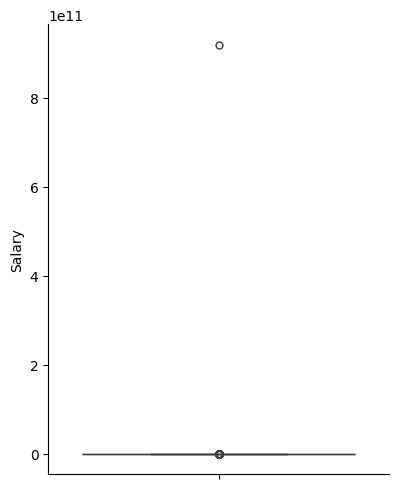

In [67]:
plt.figure(figsize=(2, 6))
sns.catplot(jobs_cleaning, y="Salary", aspect=0.8, kind="box")

In [68]:
# Top 10 mức lương cao nhất
top_10_salary = pd.DataFrame(jobs_cleaning['Salary']).nlargest(10, 'Salary')
top_10_salary

,Salary
1506,9.200000e+11
833,8.000000e+07
266,7.500000e+07
1520,7.000000e+07
573,6.900000e+07
1464,6.900000e+07
100,6.500000e+07
190,6.000000e+07
1037,6.000000e+07
1172,6.000000e+07


In [69]:
# Top 10 mức lương thấp nhất
top_10_salary = pd.DataFrame(jobs_cleaning['Salary']).nsmallest(10, 'Salary')
top_10_salary

,Salary
554,0.0
826,0.0
54,1000000.0
57,1000000.0
577,1000000.0
859,1000000.0
1206,1000000.0
1539,1000000.0
359,1500000.0
305,1750000.0


In [70]:
def valid_salary(salary):
    if salary == 0 or salary > 100000000:
        return False
    return True

In [71]:
jobs_cleaning = jobs_cleaning[jobs_cleaning['Salary'].apply(valid_salary)]

<Figure size 200x600 with 0 Axes>

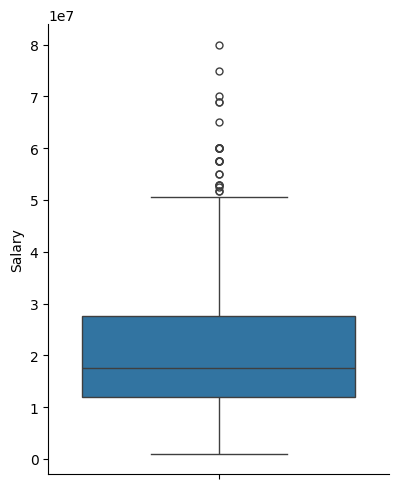

In [72]:
plt.figure(figsize=(2, 6))
sns.catplot(jobs_cleaning, y="Salary", aspect=0.8, kind="box")

Loại bỏ các giá trị Salary ngoại lệ

In [73]:
# Xử lý ngoại lệ biến Salary
Q1 = jobs_cleaning['Salary'].quantile(0.3)
Q3 = jobs_cleaning['Salary'].quantile(0.7)
IQR = Q3 - Q1

jobs_cleaning = jobs_cleaning[(jobs_cleaning['Salary'] >= (Q1 - 1.5 * IQR)) & (jobs_cleaning['Salary'] <= (Q3 + 1.5 * IQR))]
jobs_cleaning = jobs_cleaning[jobs_cleaning['Salary'] > 0]

Sau khi loại bỏ các giá trị Salary ngoại lệ

<Figure size 200x600 with 0 Axes>

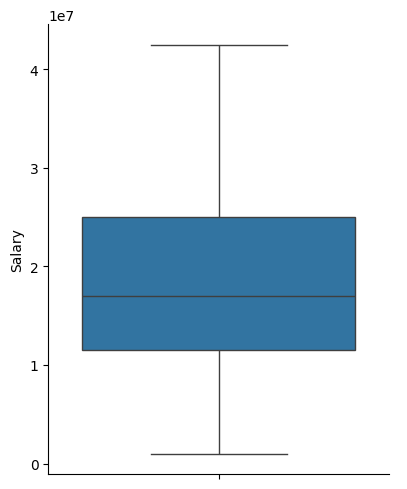

In [74]:
plt.figure(figsize=(2, 6))
sns.catplot(jobs_cleaning, y="Salary", aspect=0.8, kind="box")

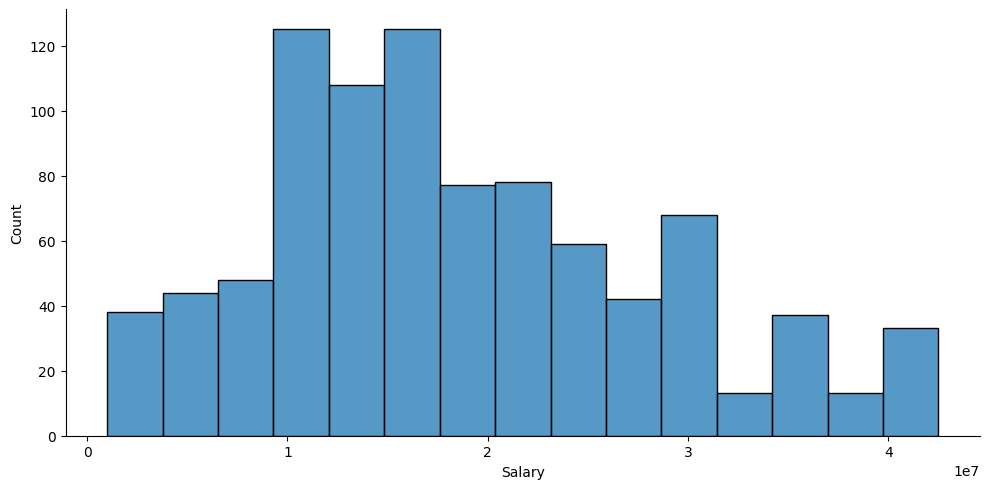

In [75]:
sns.displot(jobs_cleaning, x="Salary", height=5, aspect=2)

Mức 'Salary' sau khi được làm sạch, dữ liệu không còn là loại danh mục mà là miền giá trị liên tục

- Xác định ngôn ngữ lập trình 'Programming Languages' được yêu cầu cho 1 công việc

In [76]:
programing_languages = ['C#', 'Java', 'C++', 'C', 'Javascript', 'Python', 'PHP', 'Kotlin', 'Dart', 'TypeScript']

In [77]:
def analyze_programing_language(text):
    # Kiểm tra nếu giá trị là chuỗi
    if isinstance(text, str):
        # Tạo một biểu thức chính quy từ danh sách các ngôn ngữ lập trình
        regex_pattern = r'(?<!\w)(?:' + '|'.join(re.escape(lang.lower()) for lang in programing_languages) + r')(?!\w)'

        # Tìm kiếm các ngôn ngữ lập trình trong văn bản đầu vào và duy trì thứ tự xuất hiện
        matches = re.findall(regex_pattern, text.lower())

        # Trả về các ngôn ngữ lập trình tìm thấy
        unique_matches = list(set(matches))
        
        return unique_matches
    else:
        return []

In [78]:
jobs_cleaning['Programming Languages'] = jobs_cleaning['Skills'].apply(analyze_programing_language)
jobs_cleaning.head()

,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills,Programming Languages
0,27000000.0,Hà Nội,Nhân viên,3 năm,Toàn thời gian,Không yêu cầu,Tốt nghiệp đại học chuyên ngành Tin học/ Hệ th...,[]
1,10000000.0,Hồ Chí Minh,Nhân viên,1 năm,Toàn thời gian,Nam,"Đối tượng: có kinh nghiệm thực, trên 1 đến 2 n...",[]
2,3000000.0,Hà Nội,Thực tập sinh,Dưới 1 năm,Toàn thời gian,Không yêu cầu,Có hiểu biết về PC.Có hiểu biết về mạng nội bộ...,[]
3,14000000.0,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,Kĩ năng tiếng Nhật hoặc Tiếng Anh tốt (đọc viế...,[]
4,15000000.0,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,• Kĩ năng tiếng Anh/Tiếng Nhật tốt (đọc viết t...,[]


- Xác định ngoại ngữ 'Language' được yêu câu cho 1 công việc

In [79]:
languages = ['Tiếng Anh', 'Tiếng Nhật', 'Japanese', 'English']

In [80]:
def analyze_language(text):
    # Kiểm tra nếu giá trị là chuỗi
    if isinstance(text, str):
        # Tạo một biểu thức chính quy từ danh sách các ngôn ngữ
        regex_pattern = r'(?<!\w)(?:' + '|'.join(re.escape(lang.lower()) for lang in languages) + r')(?!\w)'

        # Tìm kiếm các ngôn ngữ trong văn bản đầu vào và duy trì thứ tự xuất hiện
        matches = re.findall(regex_pattern, text.lower())

        # Trả về các ngôn ngữ tìm thấy
        unique_matches = list(set(matches))

        if 'japanese' in unique_matches:
            unique_matches.remove('japanese')
            unique_matches.append('tiếng nhật')
        if 'english' in unique_matches:
            unique_matches.remove('english')
            unique_matches.append('tiếng anh')
        
        return unique_matches
    else:
        return []

In [81]:
jobs_cleaning['Languages'] = jobs_cleaning['Skills'].apply(analyze_language)
jobs_cleaning.head()

,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills,Programming Languages,Languages
0,27000000.0,Hà Nội,Nhân viên,3 năm,Toàn thời gian,Không yêu cầu,Tốt nghiệp đại học chuyên ngành Tin học/ Hệ th...,[],[]
1,10000000.0,Hồ Chí Minh,Nhân viên,1 năm,Toàn thời gian,Nam,"Đối tượng: có kinh nghiệm thực, trên 1 đến 2 n...",[],[]
2,3000000.0,Hà Nội,Thực tập sinh,Dưới 1 năm,Toàn thời gian,Không yêu cầu,Có hiểu biết về PC.Có hiểu biết về mạng nội bộ...,[],[]
3,14000000.0,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,Kĩ năng tiếng Nhật hoặc Tiếng Anh tốt (đọc viế...,[],"[tiếng nhật, tiếng anh]"
4,15000000.0,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,• Kĩ năng tiếng Anh/Tiếng Nhật tốt (đọc viết t...,[],"[tiếng nhật, tiếng anh]"


- Tách dữ liệu đa biến thành đơn biến

In [82]:
def array_to_single_value(column_name, new_column_name, value_other):
    # Tạo một DataFrame mới để chứa các bản ghi đã tách
    new_rows = []

    # Duyệt qua các hàng trong DataFrame hiện tại
    for index, row in jobs_cleaning.iterrows():
        skills = row[column_name]
        if isinstance(skills, list):
            if skills.__len__() == 0:
                new_row = row.copy()
                new_row[new_column_name] = value_other
                new_row.pop(column_name)
                new_rows.append(new_row)
            else:
                for skill in skills:
                    new_row = row.copy()
                    new_row[new_column_name] = skill
                    new_row.pop(column_name)
                    new_rows.append(new_row)

    # Tạo DataFrame mới từ danh sách các bản ghi đã tách
    return pd.DataFrame(new_rows)

Đối với ngôn ngữ lập trình

In [83]:
jobs_cleaning = array_to_single_value('Programming Languages', 'Programming Language', 'Khác')
jobs_cleaning.head()

,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills,Languages,Programming Language
0,27000000.0,Hà Nội,Nhân viên,3 năm,Toàn thời gian,Không yêu cầu,Tốt nghiệp đại học chuyên ngành Tin học/ Hệ th...,[],Khác
1,10000000.0,Hồ Chí Minh,Nhân viên,1 năm,Toàn thời gian,Nam,"Đối tượng: có kinh nghiệm thực, trên 1 đến 2 n...",[],Khác
2,3000000.0,Hà Nội,Thực tập sinh,Dưới 1 năm,Toàn thời gian,Không yêu cầu,Có hiểu biết về PC.Có hiểu biết về mạng nội bộ...,[],Khác
3,14000000.0,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,Kĩ năng tiếng Nhật hoặc Tiếng Anh tốt (đọc viế...,"[tiếng nhật, tiếng anh]",Khác
4,15000000.0,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,• Kĩ năng tiếng Anh/Tiếng Nhật tốt (đọc viết t...,"[tiếng nhật, tiếng anh]",Khác


Đối với ngoại ngữ

In [84]:
jobs_cleaning = array_to_single_value('Languages', 'Requirement Language', 'Không yêu cầu')
jobs_cleaning.head()

,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills,Programming Language,Requirement Language
0,27000000.0,Hà Nội,Nhân viên,3 năm,Toàn thời gian,Không yêu cầu,Tốt nghiệp đại học chuyên ngành Tin học/ Hệ th...,Khác,Không yêu cầu
1,10000000.0,Hồ Chí Minh,Nhân viên,1 năm,Toàn thời gian,Nam,"Đối tượng: có kinh nghiệm thực, trên 1 đến 2 n...",Khác,Không yêu cầu
2,3000000.0,Hà Nội,Thực tập sinh,Dưới 1 năm,Toàn thời gian,Không yêu cầu,Có hiểu biết về PC.Có hiểu biết về mạng nội bộ...,Khác,Không yêu cầu
3,14000000.0,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,Kĩ năng tiếng Nhật hoặc Tiếng Anh tốt (đọc viế...,Khác,tiếng nhật
3,14000000.0,Hà Nội,Nhân viên,1 năm,Toàn thời gian,Không yêu cầu,Kĩ năng tiếng Nhật hoặc Tiếng Anh tốt (đọc viế...,Khác,tiếng anh


- Sau khi tách đa biến thành đơn biến

Đối với ngôn ngữ lập trình

Programming Language
Khác          632
java          109
javascript    107
python         51
php            47
c#             42
c              28
typescript     21
c++            19
kotlin         15
dart            1
Name: count, dtype: int64


C:\Users\TUAN\AppData\Local\Temp\ipykernel_2456\502853134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Programming Language', data=jobs_cleaning.explode('Programming Language'),


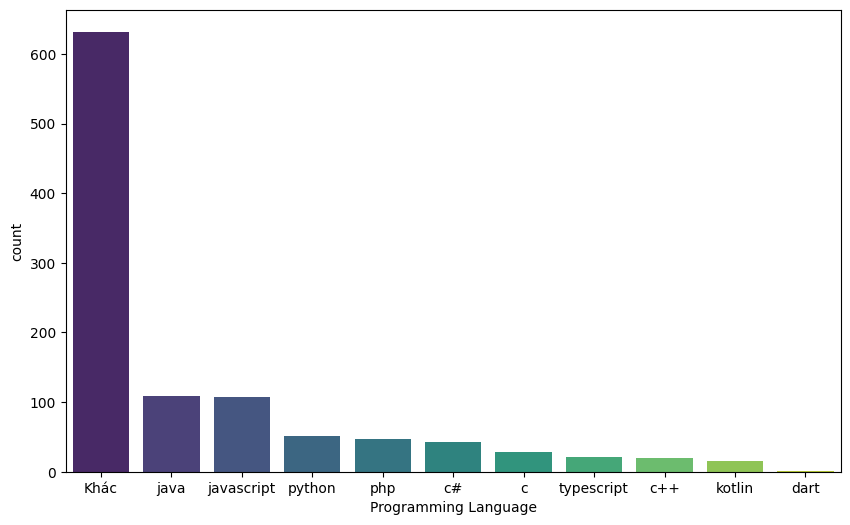

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Programming Language', data=jobs_cleaning.explode('Programming Language'), 
    order=jobs_cleaning['Programming Language'].value_counts().index, palette='viridis')

print(jobs_cleaning['Programming Language'].value_counts())

Đối với ngoại ngữ

Requirement Language
Không yêu cầu    687
tiếng anh        342
tiếng nhật        43
Name: count, dtype: int64


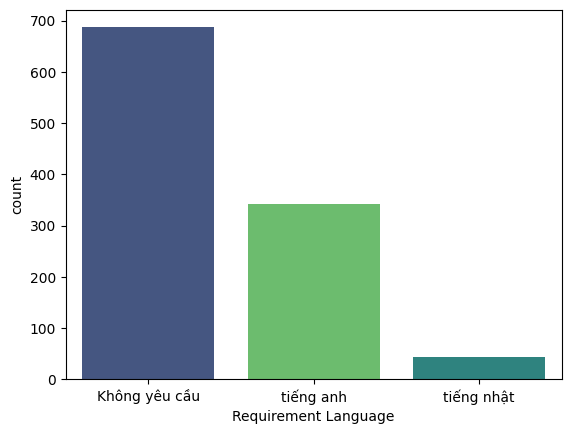

In [86]:
sns.countplot(x='Requirement Language', data=jobs_cleaning.explode('Requirement Language'), hue="Requirement Language",
    order=jobs_cleaning['Requirement Language'].explode().value_counts().index, palette='viridis')

print(jobs_cleaning['Requirement Language'].value_counts())

- Detect ngôn ngữ được sử dụng để viết về bài tuyển dụng

In [87]:
def detect_language(text):
    try:
        language = detect(text)
        if language == 'en':
            return "en"
        elif language == 'vi':
            return "vi"
        else:
            return "other"
    except Exception as e:
        return "Unknown"

In [88]:
jobs_cleaning['Description Language'] = jobs_cleaning['Skills'].apply(detect_language)

Description Language
vi    912
en    160
Name: count, dtype: int64


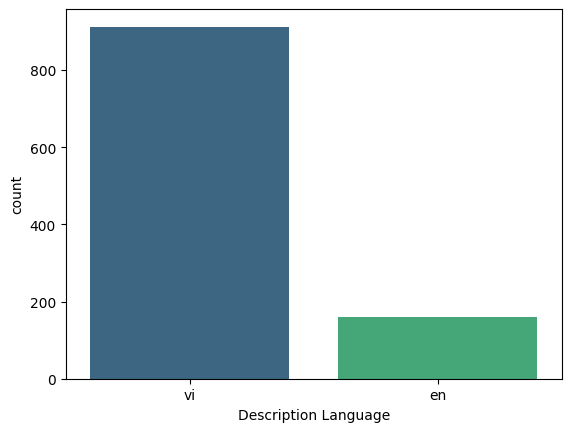

In [89]:
sns.countplot(x='Description Language', data=jobs_cleaning.explode('Description Language'), hue="Description Language",
    order=jobs_cleaning['Description Language'].explode().value_counts().index, palette='viridis')

print(jobs_cleaning['Description Language'].value_counts())

- Sau khi không sử dụng cột 'Skills' nữa, xóa chúng đi

In [90]:
jobs_cleaning = jobs_cleaning.drop(columns=['Skills'])

- Chuyển 'Locations' thành dữ liệu đơn

<Axes: xlabel='Locations', ylabel='count'>

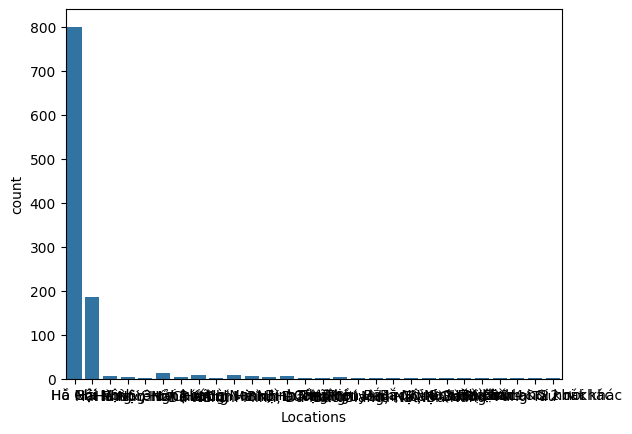

In [91]:
sns.countplot(x='Locations', data=jobs_cleaning)

'Locations' là biến kiểu dữ liệu hạng mục, một vài hạng mục xuất hiện quá ít trong dữ liệu

Chọn 3 thành phố lớn là dữ hiệu hạng mục cho biến Location, trường hợp còn lại cho thành biến 'Khác'

In [92]:
jobs_cleaning['Location'] = jobs_cleaning['Locations'].apply(lambda l: l if l in ['Hà Nội', 'Đà Nẵng', 'Hồ Chí Minh'] else 'Khác')
jobs_cleaning = jobs_cleaning.drop(columns=['Locations'])

<Axes: xlabel='Location', ylabel='count'>

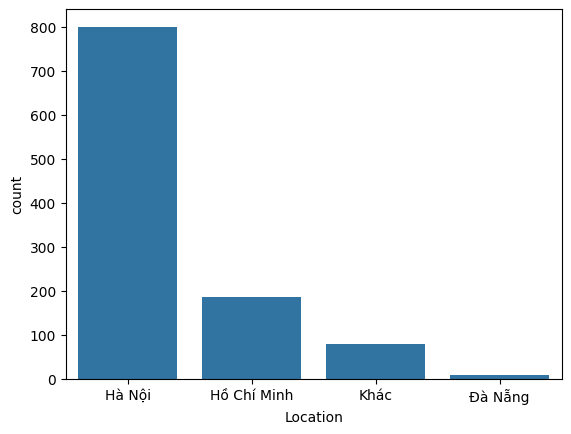

In [93]:
sns.countplot(x='Location', data=jobs_cleaning)

- Các cột còn lại sau khi làm sạch dữ liệu

In [94]:
jobs_cleaning['Level'].unique()

array(['Nhân viên', 'Thực tập sinh', 'Trưởng nhóm', 'Quản lý / Giám sát',
       'Trưởng/Phó phòng', 'Giám đốc'], dtype=object)

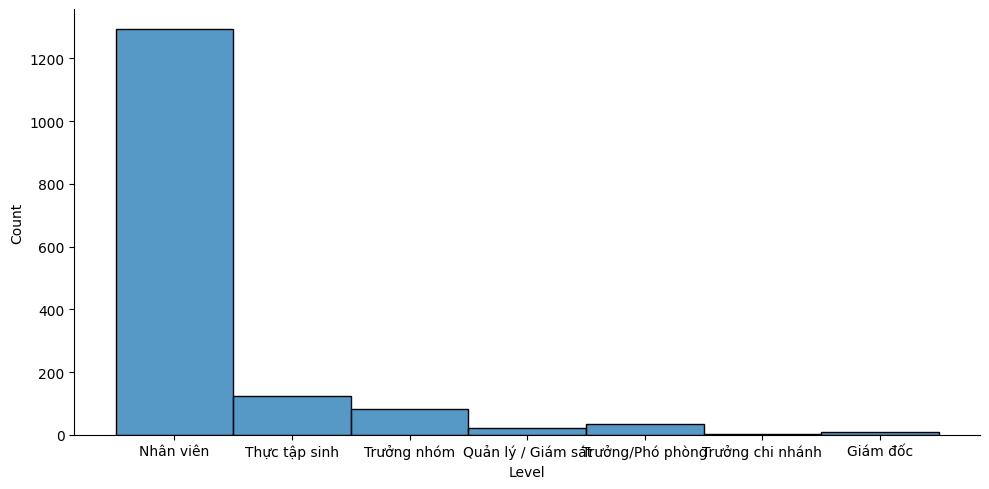

In [95]:
sns.displot(jobs, x="Level", kind="hist", height=5, aspect=2)

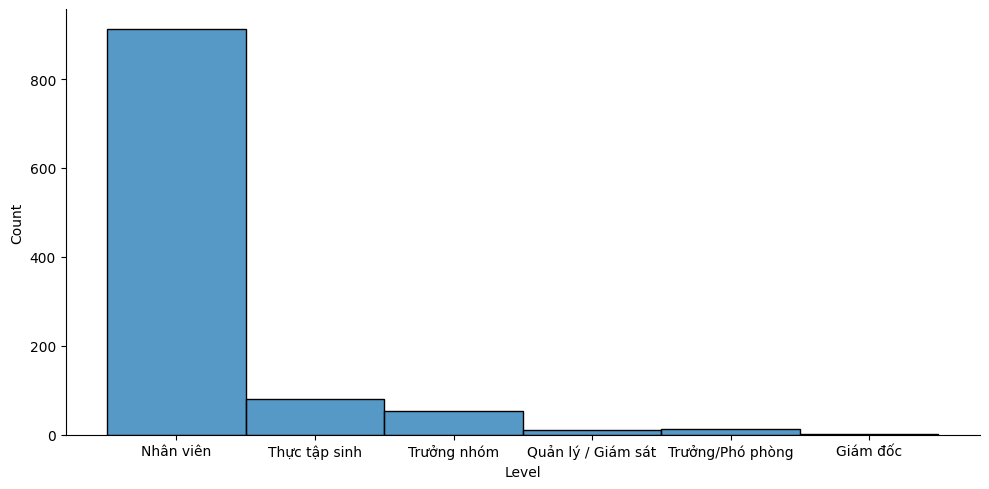

In [96]:
sns.displot(jobs_cleaning, x="Level", kind="hist", height=5, aspect=2)

<Axes: xlabel='Level'>

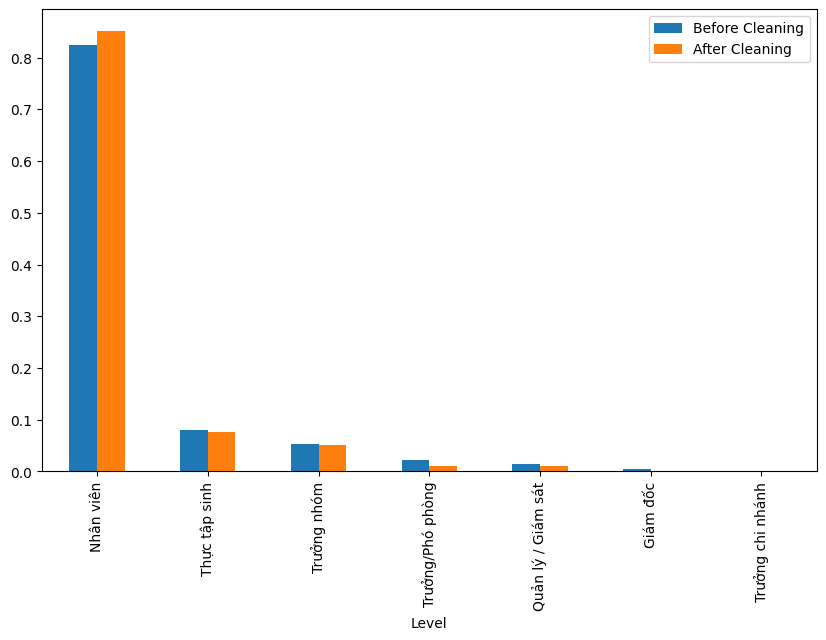

In [97]:
level = jobs['Level'].value_counts()
level_new = jobs_cleaning['Level'].value_counts()

level_ratio = level / level.sum()
level_new_ratio = level_new / level_new.sum()

df = pd.DataFrame(data=[level_ratio, level_new_ratio], index=['Before Cleaning', 'After Cleaning'])
df = df.T

df.plot(kind='bar', figsize=(10, 6))

In [98]:
jobs_cleaning['Contract Type'].unique()

array(['Toàn thời gian', 'Thực tập', 'Bán thời gian'], dtype=object)

                Contract Type  Contract Type After Cleaning
Contract Type                                              
Toàn thời gian           1507                          1038
Thực tập                   46                            26
Bán thời gian              14                             8


<Axes: xlabel='Contract Type', ylabel='Số lượng'>

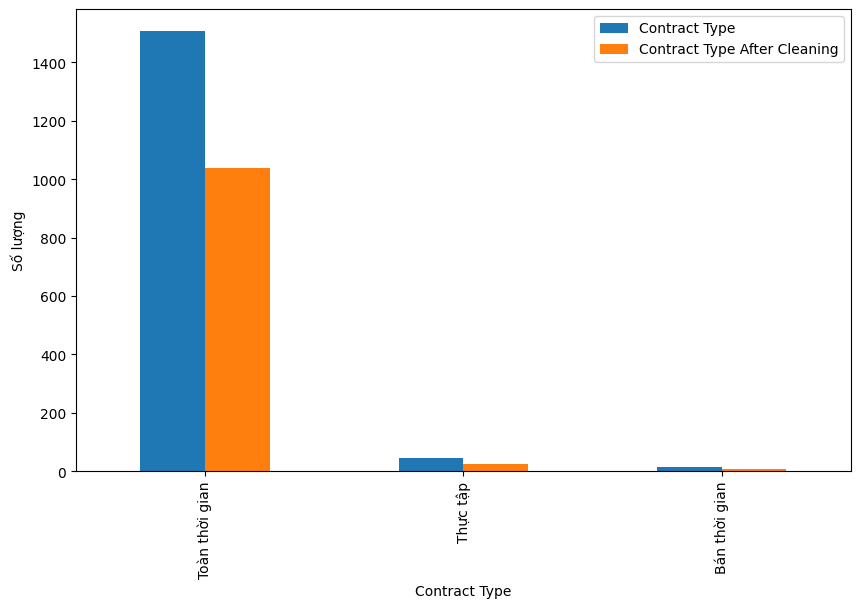

In [99]:
contract_type = jobs['Contract Type'].value_counts()
contract_type_new = jobs_cleaning['Contract Type'].value_counts()

df = pd.DataFrame(data=[contract_type, contract_type_new], index=['Contract Type', 'Contract Type After Cleaning'])
df = df.T
print(df)

df.plot(kind='bar', ylabel='Số lượng',  figsize=(10, 6))

<Axes: xlabel='Contract Type'>

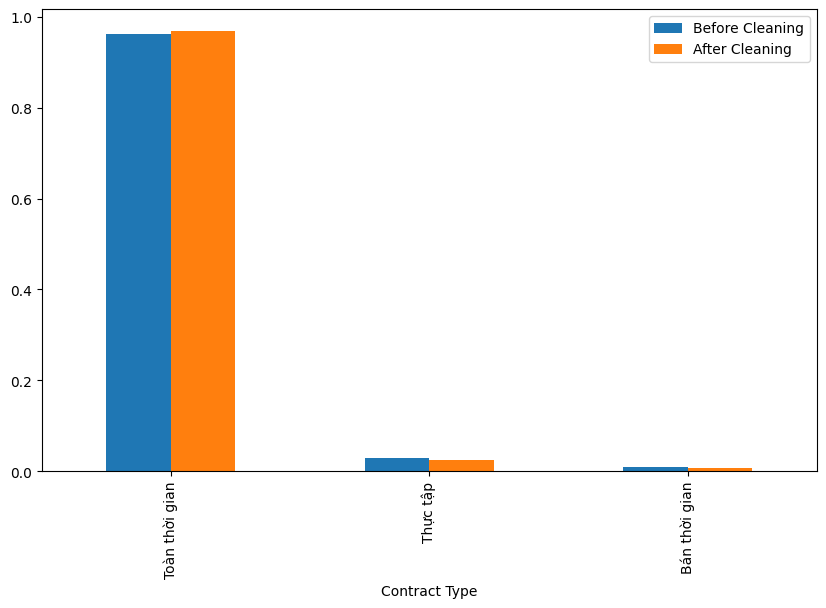

In [100]:
contract_type_ratio = contract_type / contract_type.sum()
contract_type_new_ratio = contract_type_new / contract_type_new.sum()

df = pd.DataFrame(data=[contract_type_ratio, contract_type_new_ratio], index=['Before Cleaning', 'After Cleaning'])
df = df.T

df.plot(kind='bar', figsize=(10, 6))

In [101]:
jobs_cleaning['Year of Experience'].unique()

array(['3 năm', '1 năm', 'Dưới 1 năm', '2 năm', '4 năm',
       'Không yêu cầu kinh nghiệm', '5 năm', 'Trên 5 năm'], dtype=object)

In [102]:
year_of_experience_index = np.array(['Không yêu cầu kinh nghiệm', 'Dưới 1 năm', '1 năm', '2 năm', '3 năm', '4 năm', '5 năm', 'Trên 5 năm'])

                           Year of Experience  \
Year of Experience                              
Không yêu cầu kinh nghiệm                 276   
Dưới 1 năm                                141   
1 năm                                     339   
2 năm                                     388   
3 năm                                     248   
4 năm                                      68   
5 năm                                      82   
Trên 5 năm                                 25   

                           Year of Experience After Cleaning  
Year of Experience                                            
Không yêu cầu kinh nghiệm                                201  
Dưới 1 năm                                               115  
1 năm                                                    247  
2 năm                                                    266  
3 năm                                                    163  
4 năm                                                     33  
5 năm

<Axes: xlabel='Year of Experience', ylabel='Số lượng'>

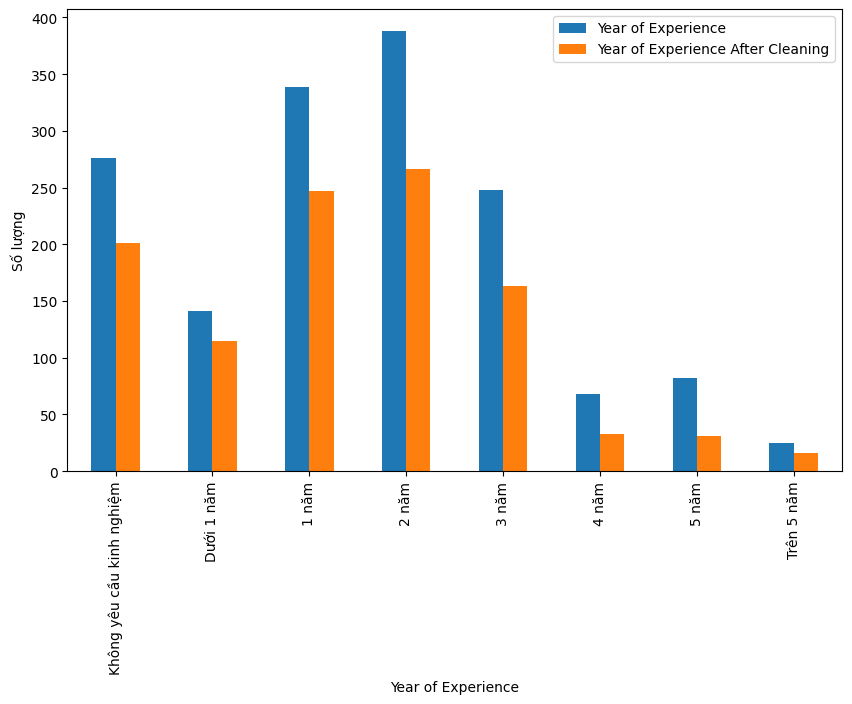

In [103]:
year_of_experience = jobs['Year of Experience'].value_counts().reindex(year_of_experience_index)
year_of_experience_new = jobs_cleaning['Year of Experience'].value_counts().reindex(year_of_experience_index)

df = pd.DataFrame(data=[year_of_experience, year_of_experience_new], index=['Year of Experience', 'Year of Experience After Cleaning'])
df = df.T
print(df)

df.plot(kind='bar', ylabel='Số lượng',  figsize=(10, 6))

<Axes: xlabel='Year of Experience', ylabel='Tỉ lệ'>

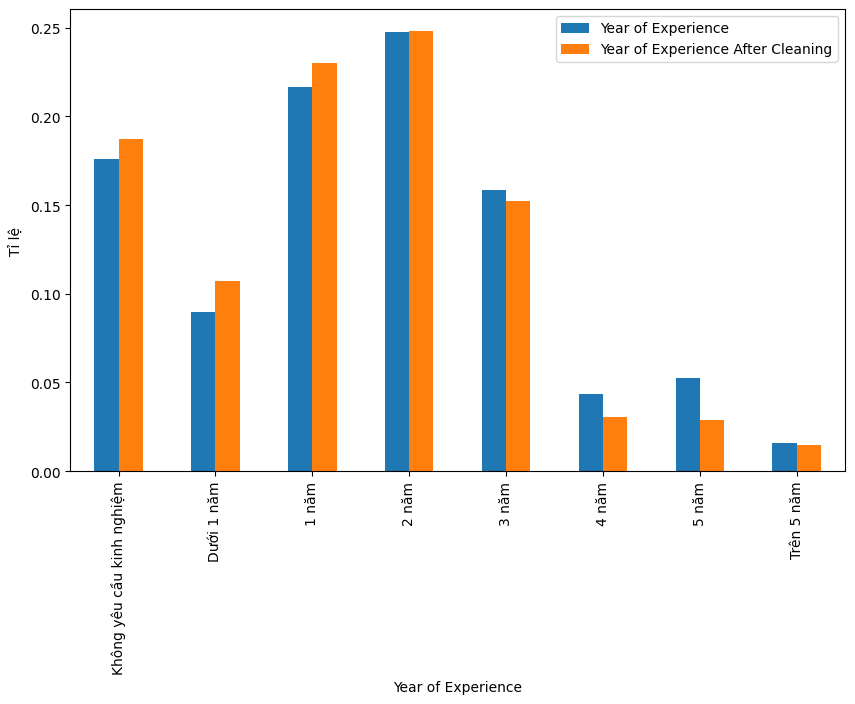

In [104]:
# Tính tỉ lệ của từng nhóm trong dữ liệu gốc
experience_ratio = year_of_experience / year_of_experience.sum()

# Tính tỉ lệ của từng nhóm trong dữ liệu sau khi làm sạch
experience_new_ratio = year_of_experience_new / year_of_experience_new.sum()

# Tạo DataFrame mới chứa tỉ lệ
df_ratio = pd.DataFrame({'Year of Experience': experience_ratio, 'Year of Experience After Cleaning': experience_new_ratio})

# Vẽ biểu đồ cột
df_ratio.plot(kind='bar', ylabel='Tỉ lệ', figsize=(10, 6))

<Axes: xlabel='Sex', ylabel='Số lượng'>

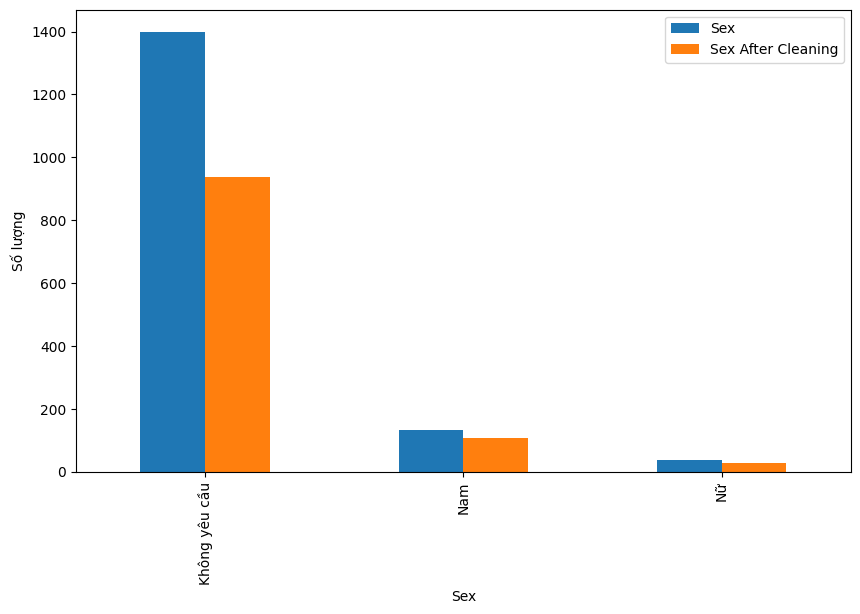

In [105]:
sex = jobs['Sex'].value_counts()
sex_new = jobs_cleaning['Sex'].value_counts()

df = pd.DataFrame(data=[sex, sex_new], index=['Sex', 'Sex After Cleaning'])
df = df.T

df.plot(kind='bar', ylabel='Số lượng',  figsize=(10, 6))

<Axes: xlabel='Sex', ylabel='Tỉ lệ'>

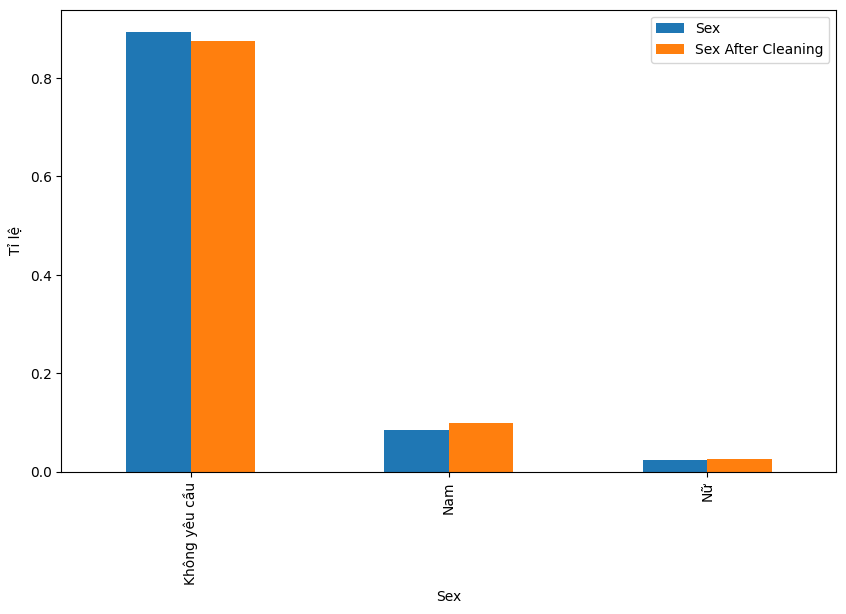

In [106]:
# Tính tỉ lệ của từng nhóm trong dữ liệu gốc
sex_ratio = sex / sex.sum()

# Tính tỉ lệ của từng nhóm trong dữ liệu sau khi làm sạch
sex_new_ratio = sex_new / sex_new.sum()

# Tạo DataFrame mới chứa tỉ lệ
df_ratio = pd.DataFrame({'Sex': sex_ratio, 'Sex After Cleaning': sex_new_ratio})

# Vẽ biểu đồ cột
df_ratio.plot(kind='bar', ylabel='Tỉ lệ', figsize=(10, 6))

Những biến mà không được làm sạch hoặc chuẩn hóa lên biến đó thì kích thước thay đổi trước và sau do có mở rộng và xóa đi những mẫu. Tuy nhiên tỉ lệ của các nhãn không thay đổi nhiều

- Sau khi làm sạch lưu vào file csv

In [107]:
jobs_cleaning.to_csv(clean_data_detination_path, index=False)

In [108]:
jobs_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1072 entries, 0 to 1566
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Salary                1072 non-null   float64
 1   Level                 1072 non-null   object 
 2   Year of Experience    1072 non-null   object 
 3   Contract Type         1072 non-null   object 
 4   Sex                   1072 non-null   object 
 5   Programming Language  1072 non-null   object 
 6   Requirement Language  1072 non-null   object 
 7   Description Language  1072 non-null   object 
 8   Location              1072 non-null   object 
dtypes: float64(1), object(8)
memory usage: 116.0+ KB
